In [1]:
# Started on Tuesday 3 December 2024, 9:43 AM
# modified on 2:00pm 3 december 2024 and ongoing
import numpy as np
from matplotlib import pyplot as plt
# library imports

In [2]:
# constant declarations for ODEs
A = 0.25
b = 4.0
F = 8.0
G = 1.0

In [3]:
# declarations of timesteps, ODEs, and initial conditions. 
tvals = np.arange(0,120*24+4, 4)/ (24*5) # out to 120 days (fencepost thing)
dt = 4 / (24*5) # 4 hours divided by num hours in 5 days
# timestep of 4 hours. the divide by 5 is the normalization time value

dxdt = lambda x,y,z: -(y**2) - (z**2) - A*x + A*F
dydt = lambda x,y,z: x*y - b*x*z - y + G
dzdt = lambda x,y,z: x*z + b*x*y - z

first_cond =  {"x0":2.5, "y0":1.0, "z0":0.0}
second_cond = {"x0":2.49, "y0":1.0, "z0":0.0}

Condition1 = "Condition 1: x = 2.5,  y = 1.0, z = 0.0"
Condition2 = "Condition 2: x = 2.49, y = 1.0, z = 0.0"


In [4]:
def doIntegration(this_cond:dict):
    
    xvals = np.zeros_like(tvals)
    yvals = np.zeros_like(tvals)
    zvals = np.zeros_like(tvals)
    
    xvals[0] = this_cond["x0"]
    yvals[0] = this_cond["y0"]
    zvals[0] = this_cond["z0"]
    
    for i in range(len(tvals)-1):
     
        xvals[i+1] = xvals[i] + dt * dxdt(xvals[i],yvals[i],zvals[i])
        yvals[i+1] = yvals[i] + dt * dydt(xvals[i],yvals[i],zvals[i])
        zvals[i+1] = zvals[i] + dt * dzdt(xvals[i],yvals[i],zvals[i])
        
    return {"xvals":xvals,"yvals":yvals,"zvals":zvals}
    
def doPlots(tvals,firstResult,secondResult):
    fig,axs = plt.subplots(3,figsize=(10,10),sharex="col") # change to a single column
    newtime = tvals*24*5 # back in normal time units
    
    l1 = axs[0].plot(newtime,firstResult["xvals"],label="Condition 1")
    l2 = axs[0].plot(newtime,secondResult["xvals"],label="Condition 2")
    axs[0].set_title("Strength of the westerly current, (x)")
    axs[0].grid()
    
    axs[1].plot(newtime,firstResult["yvals"],label="Condition 1")
    axs[1].plot(newtime,secondResult["yvals"],label="Condition 2")
    axs[1].set_title("Cosine Phase (y)")
    axs[1].grid()

    axs[2].plot(newtime,firstResult["zvals"],label="Condition 1")
    axs[2].plot(newtime,secondResult["zvals"],label="Condition 2")
    axs[2].set_title("Sine Phase, (z)")
    axs[2].grid()

    #fig.subplots_adjust(bottom=0.1)   ##  Need to play with this number.
    fig.suptitle("Perturbation Experiment for Two Initial Conditions")
    fig.supxlabel("Hours (un-normalized) since initialization (h)")
    plt.tight_layout()
    fig.legend([l1,l2],labels = [Condition1, Condition2],loc="outside upper right")


def doPlotsDiff(tvals,firstResult,secondResult):
    fig,axs = plt.subplots(3,figsize=(11,11),sharex="col") # change to a single column
    newtime = tvals*24*5 # back in normal time units
    
    l1 = axs[0].plot(newtime,firstResult["xvals"] - secondResult["xvals"],label="Condition 1")
    axs[0].set_title("X Component: Condition 1 - Condition 2")
    axs[0].grid()

    axs[1].plot(newtime,firstResult["yvals"] - secondResult["yvals"],label="Condition 1")
    axs[1].set_title("Y Component: Condition 1 - Condition 2")
    axs[1].grid()

    
    axs[2].plot(newtime,firstResult["zvals"] - secondResult["zvals"],label="Condition 1")
    axs[2].set_title("Z Component: Condition 1 - Condition 2")
    axs[2].grid()

    fig.suptitle("Difference between Condition 1 and Condition 2 of the Three Components of the simulation")
    fig.supxlabel("Hours (un-normalized) since initialization (h)")
    plt.tight_layout()

C:\Users\josep\AppData\Local\Temp\ipykernel_15036\3375976208.py:42: MatplotlibDeprecationWarning: You have mixed positional and keyword arguments, some input may be discarded.  This is deprecated since 3.9 and will become an error in 3.11.
  fig.legend([l1,l2],labels = [Condition1, Condition2],loc="outside upper right")


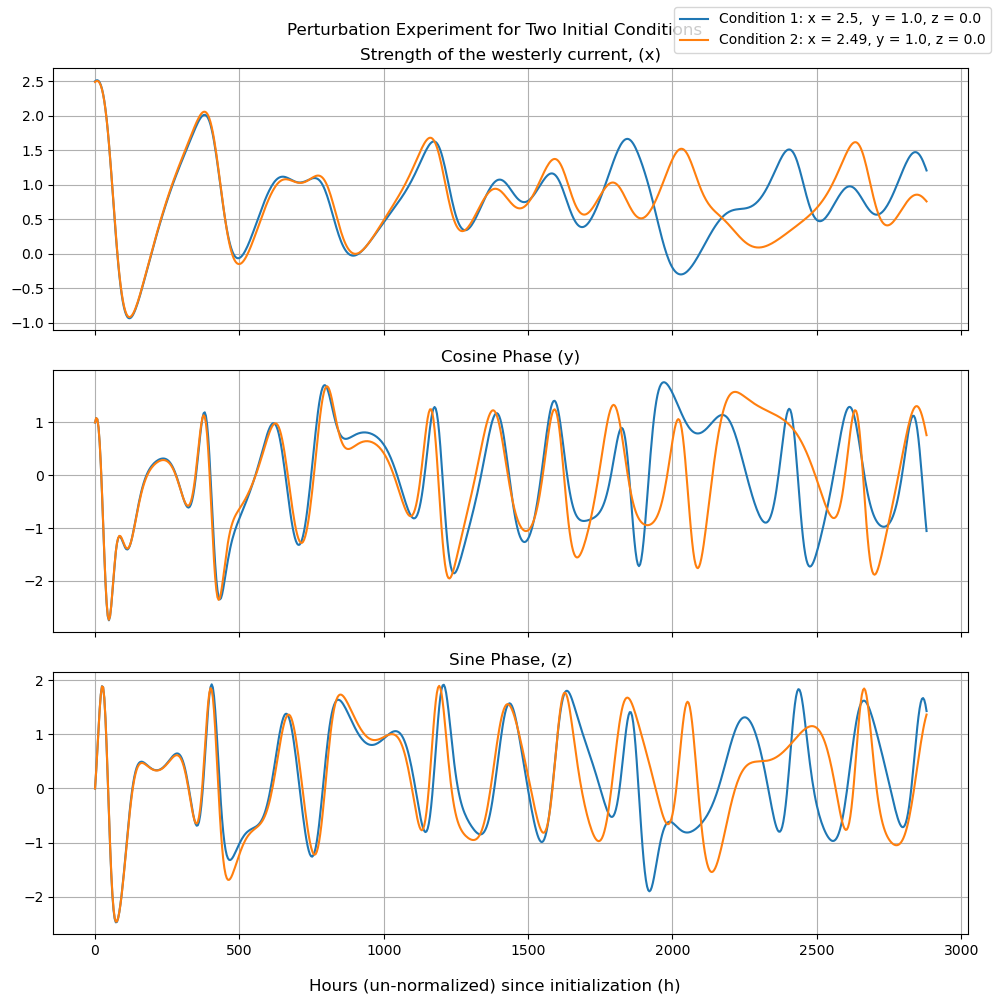

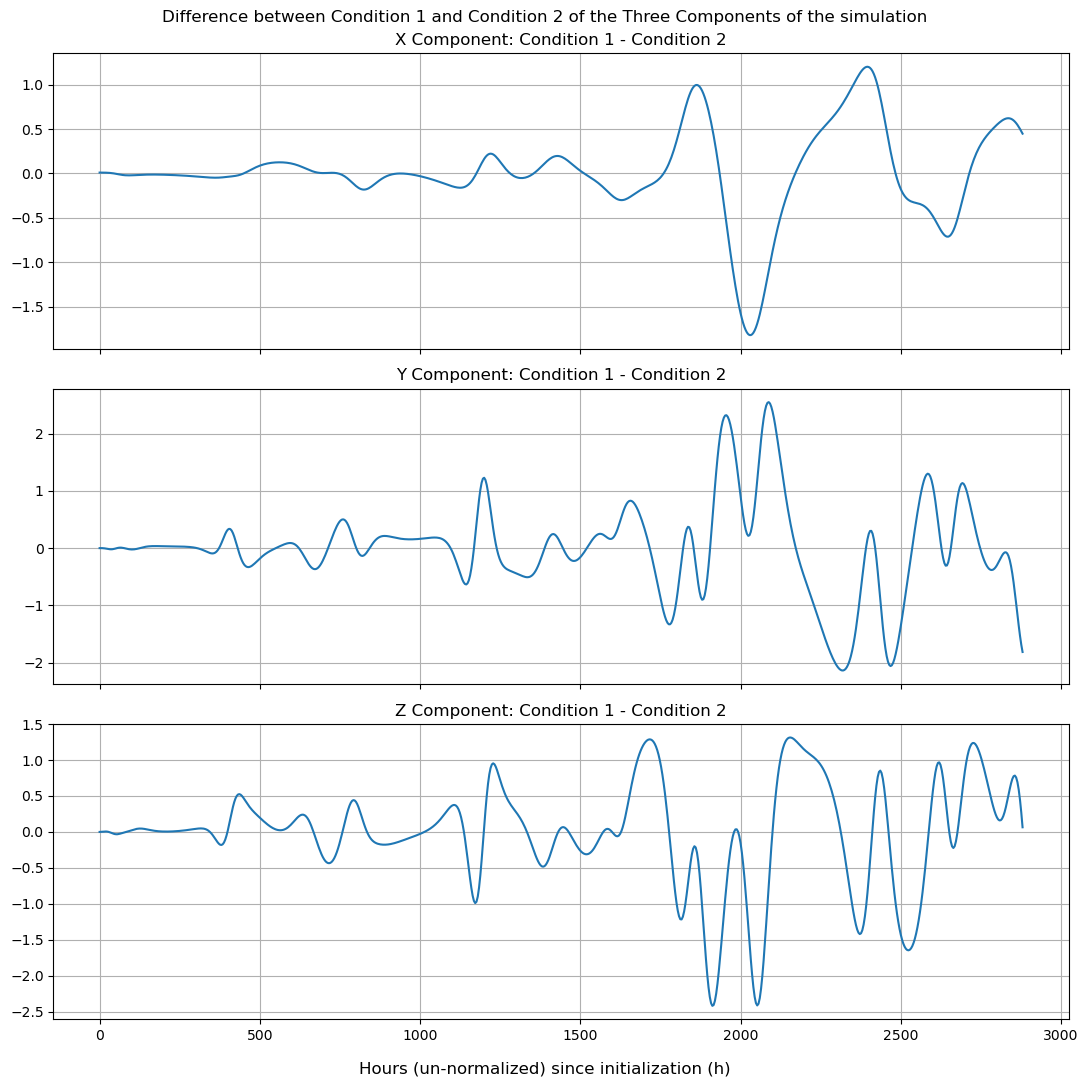

In [5]:
firstResult = doIntegration(first_cond)
secondResult = doIntegration(second_cond)

doPlots(tvals,firstResult,secondResult)
doPlotsDiff(tvals,firstResult,secondResult)


In [6]:
''' 
Question 1: 
The simulations ultimately diverge and do not remain the same (in magnitude or in phase) for the simulation period.
Yet, these differences remain small (compared to the amplitude of the waves) for roughly the first 400-500 un-normalized hours
for each component until the differences begin to grow in magnitude. 
The three components vary in both phase and amplitude, especially in the latter part of the simulation (1500 hrs and onward.)
This shows that NWP models are highly sensitive to small changes in initial conditions. 
If even small changes affect the simulation period, great care must be taken to provide balanced and accurate initial conditions to NWP models to 
achieve a successful forecast. 
'''

' \nQuestion 1: \nThe simulations ultimately diverge and do not remain the same (in magnitude or in phase) for the simulation period.\nYet, these differences remain small (compared to the amplitude of the waves) for roughly the first 400-500 un-normalized hours\nfor each component until the differences begin to grow in magnitude. \nThe three components vary in both phase and amplitude, especially in the latter part of the simulation (1500 hrs and onward.)\nThis shows that NWP models are highly sensitive to small changes in initial conditions. \nIf even small changes affect the simulation period, great care must be taken to provide balanced and accurate initial conditions to NWP models to \nachieve a successful forecast. \n'